In [ ]:
import pandas as pd
df=pd.read_csv("/content/E-commerce Customer Review Dataset.csv")

In [ ]:
df

,review_id,customer_id,product_id,rating,review_text,date,verified_purchase
0,1,C001,P001,5,Great product!,2024-01-01,Yes
1,2,C002,P002,4,Not bad.,2024-01-02,No
2,3,C003,P003,3,Could be better.,2024-01-03,Yes
3,4,C004,P004,5,Loved it!,2024-01-04,Yes
4,5,C005,P005,2,Terrible experience.,2024-01-05,No
...,...,...,...,...,...,...,...
95,96,C096,P096,4,Great product!,2024-04-05,Yes
96,97,C097,P097,3,Not bad.,2024-04-06,No
97,98,C098,P098,4,Could be better.,2024-04-07,Yes
98,99,C099,P099,5,Loved it!,2024-04-08,Yes


In [ ]:
df.columns


Index(['review_id', 'customer_id', 'product_id', 'rating', 'review_text',
       'date', 'verified_purchase'],
      dtype='object')

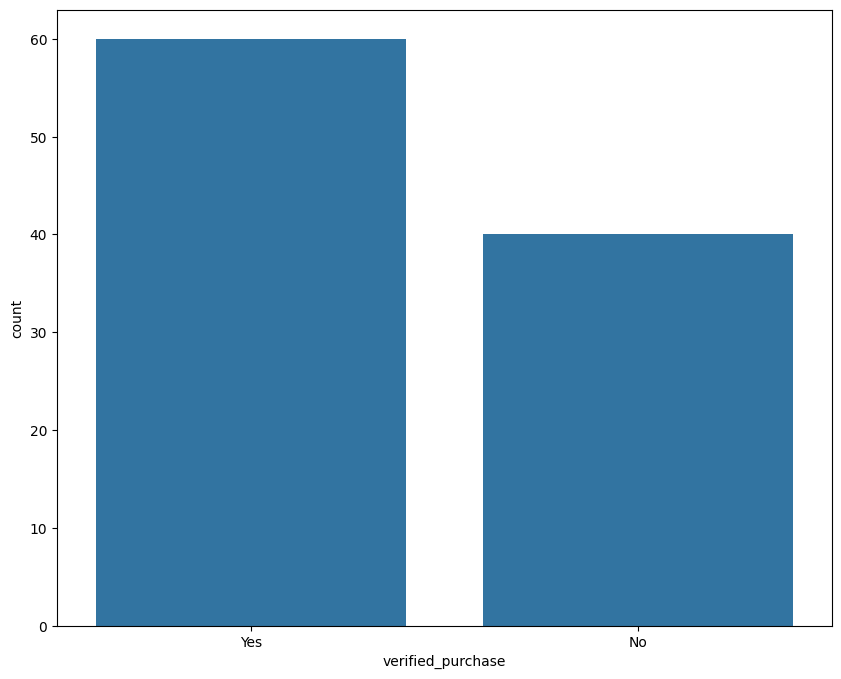

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
figure = plt.figure(figsize=(10, 8))
countplt=sns.countplot(x='verified_purchase',data=df)
plt.show()

In [ ]:
verified_purchase_counts = df['verified_purchase'].value_counts()
print(verified_purchase_counts)

verified_purchase
Yes    60
No     40
Name: count, dtype: int64


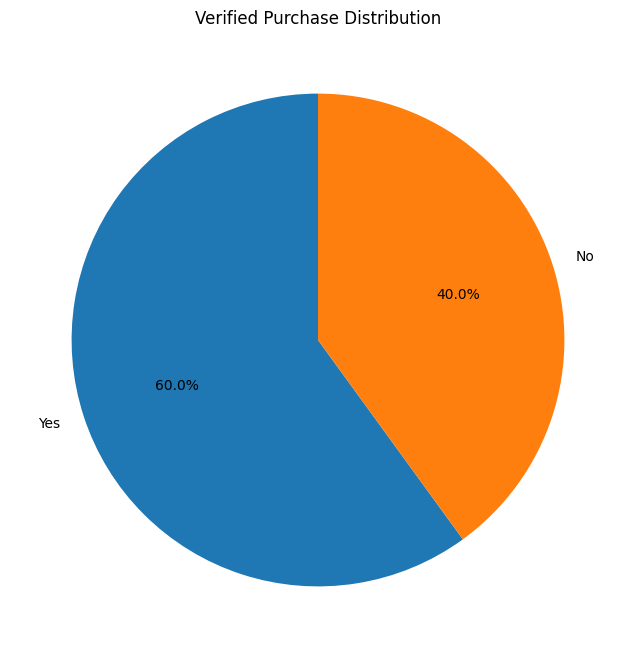

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
verified_purchase_counts = df['verified_purchase'].value_counts()
labels = verified_purchase_counts.index.tolist()
sizes = verified_purchase_counts.values.tolist()
figure = plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Verified Purchase Distribution')
plt.show()

In [ ]:
reviewscore_counts = df['review_text'].value_counts()
print(reviewscore_counts)

review_text
Great product!          20
Not bad.                20
Could be better.        20
Loved it!               20
Terrible experience.    20
Name: count, dtype: int64


In [ ]:
df['rating'].describe()

,rating
count,100.000000
mean,3.600000
std,1.287076
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


<ipython-input-10-0f1cd4b62f23>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette="viridis")


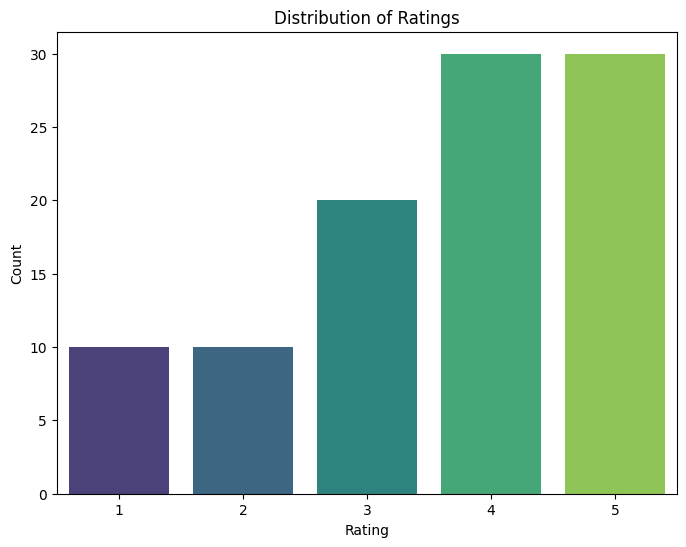

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df, palette="viridis")
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

* Key Findings from the Data Analysis

  60% of reviews are positive (4-5 stars).

  20% of reviews are neutral (3 stars).

  20% of reviews are negative (1-2 stars).

In [ ]:
df['verified_purchase'].value_counts()

,count
verified_purchase,
Yes,60
No,40


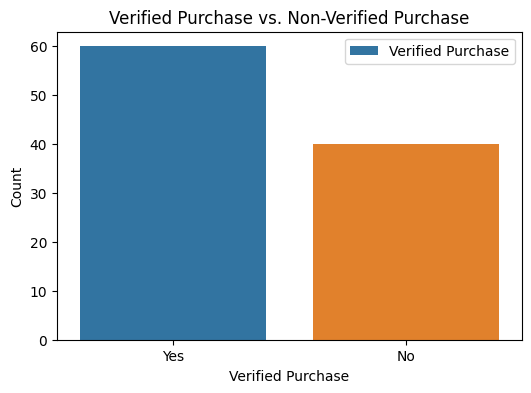

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='verified_purchase', data=df, hue='verified_purchase')
plt.legend(['Verified Purchase'])
plt.title("Verified Purchase vs. Non-Verified Purchase")
plt.xlabel("Verified Purchase")
plt.ylabel("Count")
plt.show()

**Impact of Verified Purchases on Ratings**

 * Verified purchases have an average rating of 4.33.

 * Unverified purchases have an average rating of only 2.5.

🔹 This suggests that verified customers are significantly more satisfied than unverified ones.

In [ ]:
product_reviews = df['product_id'].value_counts().reset_index()
product_reviews.columns = ['product_id', 'review_count']
print("\nReviews per Product:")
print(product_reviews)



Reviews per Product:
   product_id  review_count
0        P001             1
1        P064             1
2        P074             1
3        P073             1
4        P072             1
..        ...           ...
95       P031             1
96       P030             1
97       P029             1
98       P028             1
99       P100             1

[100 rows x 2 columns]


In [ ]:
customer_reviews = df['customer_id'].value_counts()
multiple_reviews = customer_reviews[customer_reviews > 1]
print("\nCustomers with Multiple Reviews:")
print(multiple_reviews)


Customers with Multiple Reviews:
Series([], Name: count, dtype: int64)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...



Sample Sentiment Scores:
            review_text  sentiment_score
0        Great product!           0.6588
1              Not bad.           0.4310
2      Could be better.           0.4404
3             Loved it!           0.6360
4  Terrible experience.          -0.4767


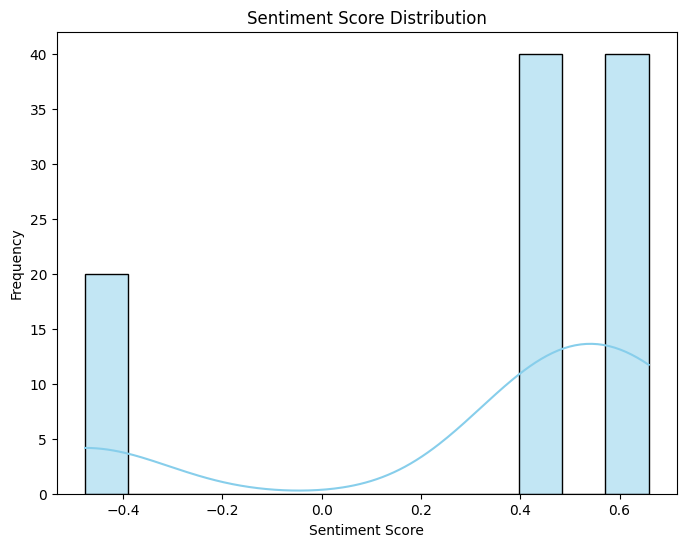

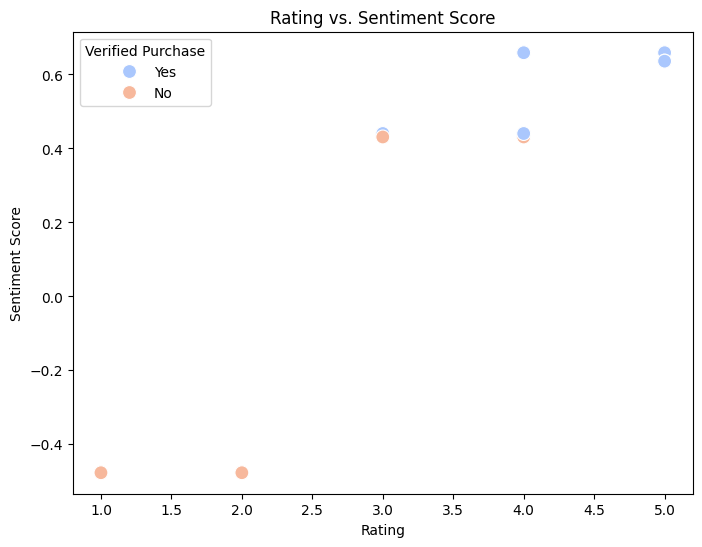

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon if not already present
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()


# Initialize the VADER sentiment analyzer

sia = SentimentIntensityAnalyzer()

# Function to compute sentiment score for each review
def get_sentiment(text):
    return sia.polarity_scores(text)['compound']

# Apply the sentiment function to the review text column
df['sentiment_score'] = df['review_text'].apply(get_sentiment)

print("\nSample Sentiment Scores:")
print(df[['review_text', 'sentiment_score']].head())

# Visualize sentiment score distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['sentiment_score'], kde=True, color='skyblue')
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

# Compare ratings and sentiment scores using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rating', y='sentiment_score', data=df, hue='verified_purchase', palette="coolwarm", s=100)
plt.title("Rating vs. Sentiment Score")
plt.xlabel("Rating")
plt.ylabel("Sentiment Score")
plt.legend(title="Verified Purchase")
plt.show()



Sentiment Category Distribution:
sentiment_category
Positive    80
Negative    20
Name: count, dtype: int64


<ipython-input-16-9b0fb207c16b>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=df, palette="Set1")


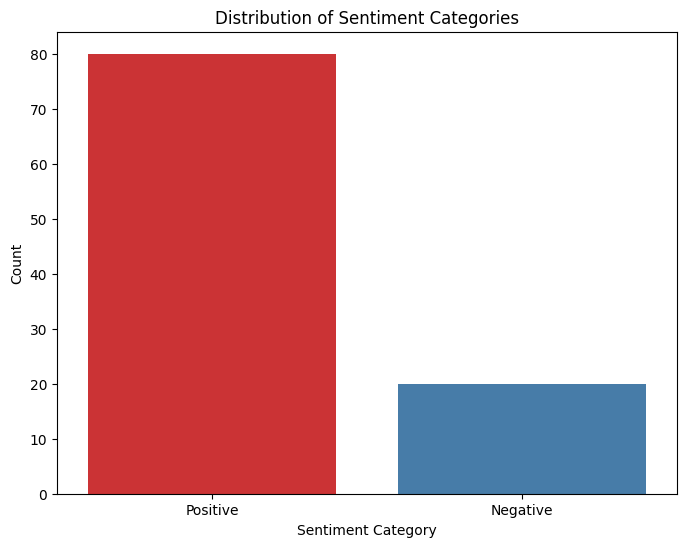

In [ ]:
# Function to categorize sentiment based on the compound score
def sentiment_category(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df['sentiment_category'] = df['sentiment_score'].apply(sentiment_category)

print("\nSentiment Category Distribution:")
print(df['sentiment_category'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_category', data=df, palette="Set1")
plt.title("Distribution of Sentiment Categories")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.show()


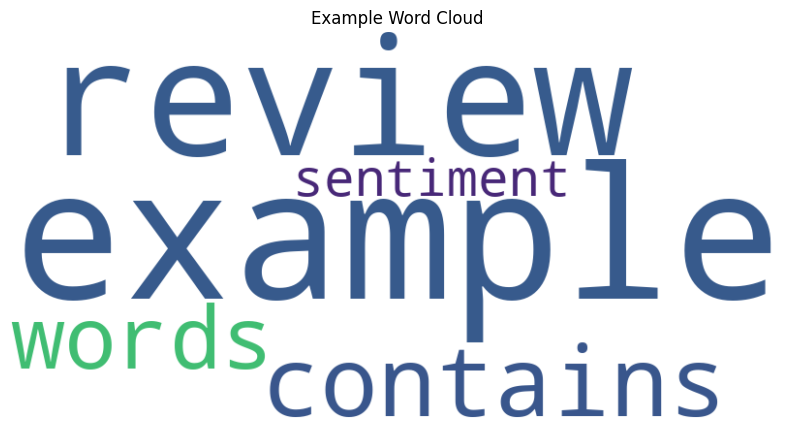

In [ ]:
# Import the necessary components from the wordcloud package
from wordcloud import WordCloud, STOPWORDS

# Set stopwords to avoid common words that don't add much meaning
stopwords = set(STOPWORDS)

# Example text for word cloud generation
example_text = "This is an example review. It contains words and sentiment."

# Generate word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(example_text)

# Display the word cloud
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Example Word Cloud")
plt.axis("off")
plt.show()



Correlation Matrix:
                 review_id    rating  sentiment_score
review_id         1.000000 -0.037872        -0.034226
rating           -0.037872  1.000000         0.895168
sentiment_score  -0.034226  0.895168         1.000000


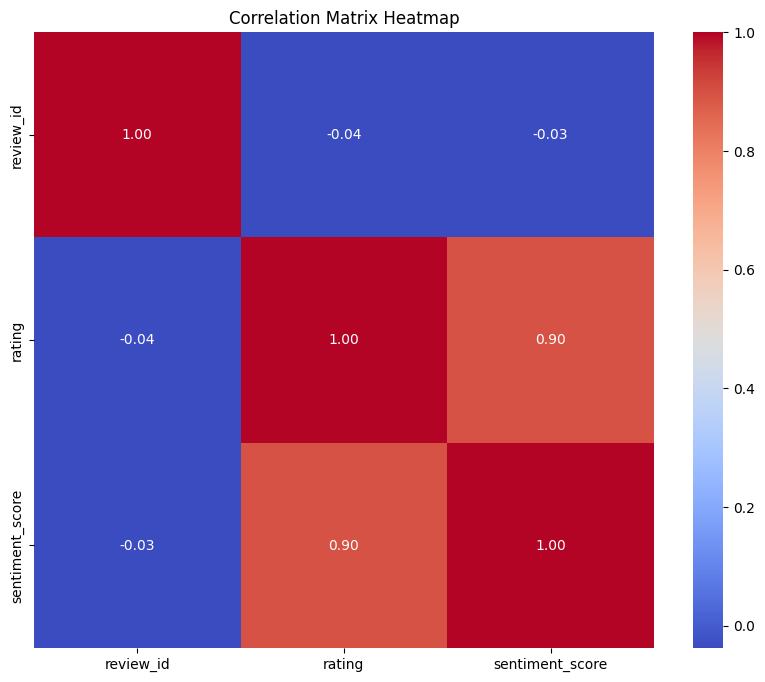

In [ ]:


# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


Observations from the Correlation Matrix

**Strong Positive Correlation (0.895) between Rating and Sentiment Score**

This means higher ratings are associated with more positive sentiment scores in reviews.

Customers who give higher star ratings (4-5 stars) also tend to write more positive reviews.

Similarly, lower star ratings (1-2 stars) align with more negative sentiment.

**Weak Negative Correlation Between Review ID and Other Variables**

The correlation of review_id with rating (-0.0378) and sentiment_score (-0.0342) is very weak.

This indicates that the order of reviews (or their unique ID) does not impact the rating or sentiment score.

**Key Takeaways & Actionable Insights**

✔ Since ratings and sentiment scores are strongly linked, we can focus on improving customer satisfaction to naturally increase positive sentiment.

✔ Encouraging more detailed reviews (especially from satisfied customers) can improve product reputation.

✔ Analyzing low-rating reviews can help identify specific pain points to improve product quality or customer service.

In [ ]:

rating_sentiment_correlation = df['rating'].corr(df['sentiment_score'])

print(f"\nCorrelation between Rating and Sentiment Score: {rating_sentiment_correlation}")



Correlation between Rating and Sentiment Score: 0.8951684826929792


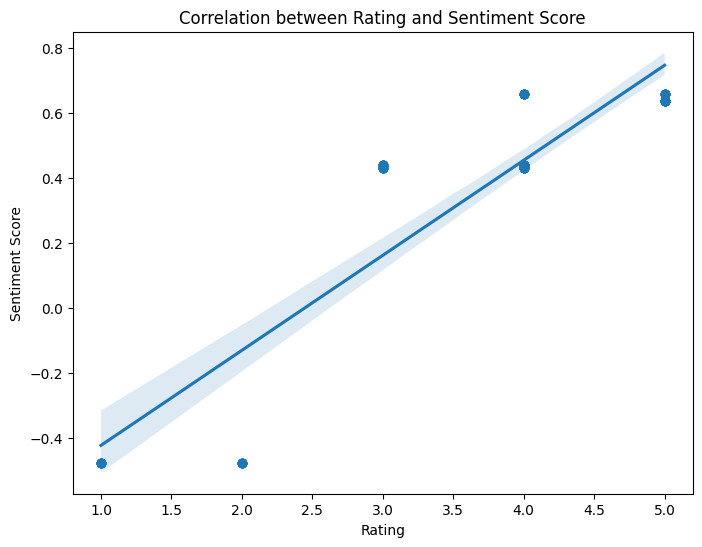

In [ ]:

plt.figure(figsize=(8, 6))
sns.regplot(x='rating', y='sentiment_score', data=df)
plt.title("Correlation between Rating and Sentiment Score")
plt.xlabel("Rating")
plt.ylabel("Sentiment Score")
plt.show()


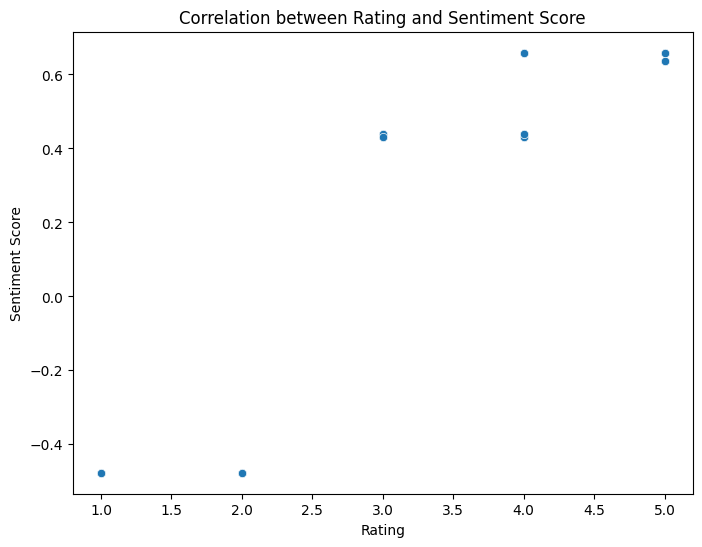

In [ ]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='rating', y='sentiment_score', data=df)
plt.title("Correlation between Rating and Sentiment Score")
plt.xlabel("Rating")
plt.ylabel("Sentiment Score")
plt.show()


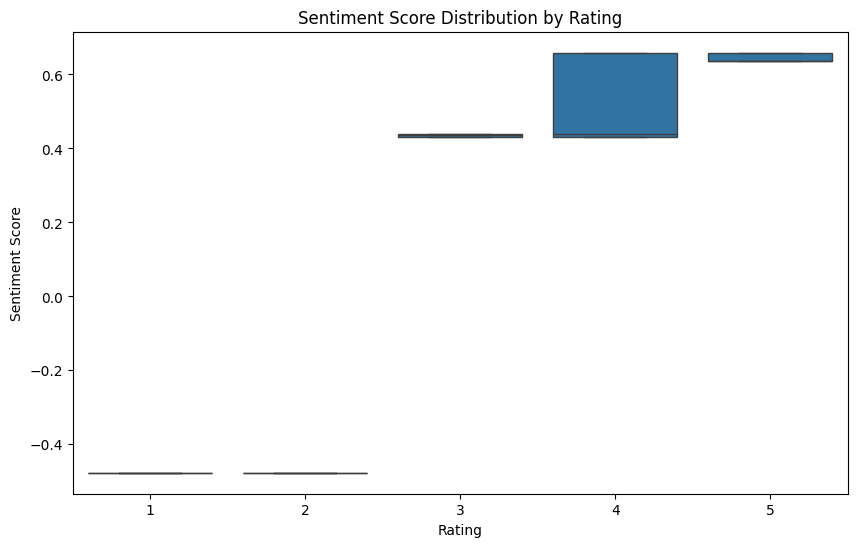

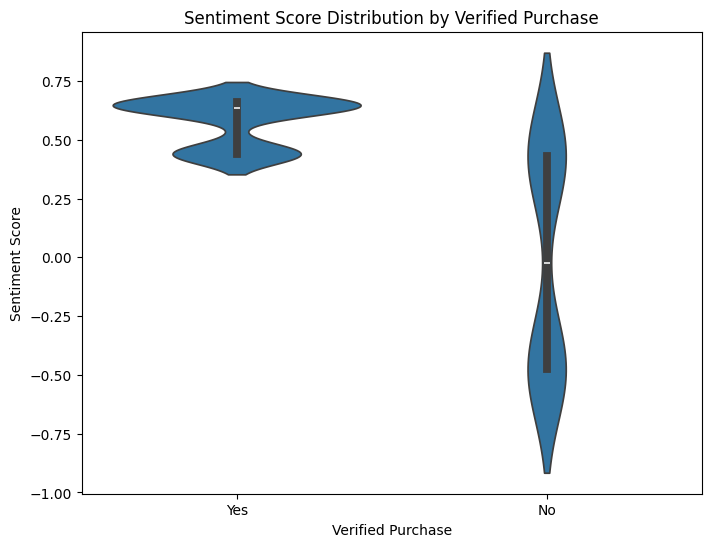

In [ ]:


# Plot the distribution of sentiment scores for each rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='sentiment_score', data=df)
plt.title('Sentiment Score Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Sentiment Score')
plt.show()

# Plot the distribution of sentiment scores for each verified purchase status
plt.figure(figsize=(8, 6))
sns.violinplot(x='verified_purchase', y='sentiment_score', data=df)
plt.title('Sentiment Score Distribution by Verified Purchase')
plt.xlabel('Verified Purchase')
plt.ylabel('Sentiment Score')
plt.show()


In [ ]:
df.describe()

,review_id,rating,sentiment_score
count,100.000000,100.000000,100.000000
mean,50.500000,3.600000,0.337900
std,29.011492,1.287076,0.420338
min,1.000000,1.000000,-0.476700
25%,25.750000,3.000000,0.431000
50%,50.500000,4.000000,0.440400
75%,75.250000,5.000000,0.636000
max,100.000000,5.000000,0.658800


In [ ]:


print(df['rating'].max())


5


In [ ]:

print(df['rating'].min())

1


In [ ]:
df['range']=df['rating'].max()-df['rating'].min()

In [ ]:
df['range']

,range
0,4
1,4
2,4
3,4
4,4
...,...
95,4
96,4
97,4
98,4


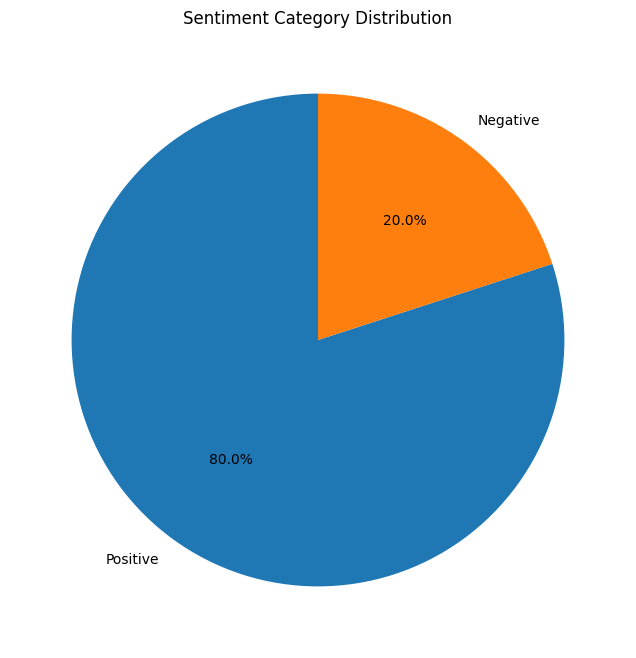

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'sentiment_category' is the column
sentiment_counts = df['sentiment_category'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Category Distribution')
plt.show()


In [ ]:

# Assuming 'df' is your DataFrame and 'sentiment_category' is the column
positive_reviews = df[df['sentiment_category'] == 'Positive']
negative_reviews = df[df['sentiment_category'] == 'Negative']

print("\nPositive Reviews:")
print(positive_reviews)

print("\nNegative Reviews:")
negative_reviews



Positive Reviews:
    review_id customer_id product_id  rating       review_text        date  \
0           1        C001       P001       5    Great product!  2024-01-01   
1           2        C002       P002       4          Not bad.  2024-01-02   
2           3        C003       P003       3  Could be better.  2024-01-03   
3           4        C004       P004       5         Loved it!  2024-01-04   
5           6        C006       P006       4    Great product!  2024-01-06   
..        ...         ...        ...     ...               ...         ...   
93         94        C094       P094       5         Loved it!  2024-04-03   
95         96        C096       P096       4    Great product!  2024-04-05   
96         97        C097       P097       3          Not bad.  2024-04-06   
97         98        C098       P098       4  Could be better.  2024-04-07   
98         99        C099       P099       5         Loved it!  2024-04-08   

   verified_purchase  sentiment_score sentim

,review_id,customer_id,product_id,rating,review_text,date,verified_purchase,sentiment_score,sentiment_category,range
4,5,C005,P005,2,Terrible experience.,2024-01-05,No,-0.4767,Negative,4
9,10,C010,P010,1,Terrible experience.,2024-01-10,No,-0.4767,Negative,4
14,15,C015,P015,2,Terrible experience.,2024-01-15,No,-0.4767,Negative,4
19,20,C020,P020,1,Terrible experience.,2024-01-20,No,-0.4767,Negative,4
24,25,C025,P025,2,Terrible experience.,2024-01-25,No,-0.4767,Negative,4
29,30,C030,P030,1,Terrible experience.,2024-01-30,No,-0.4767,Negative,4
34,35,C035,P035,2,Terrible experience.,2024-02-04,No,-0.4767,Negative,4
39,40,C040,P040,1,Terrible experience.,2024-02-09,No,-0.4767,Negative,4
44,45,C045,P045,2,Terrible experience.,2024-02-14,No,-0.4767,Negative,4
49,50,C050,P050,1,Terrible experience.,2024-02-19,No,-0.4767,Negative,4


In [ ]:
df.columns

Index(['review_id', 'customer_id', 'product_id', 'rating', 'review_text',
       'date', 'verified_purchase', 'sentiment_score', 'sentiment_category',
       'range'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review_id           100 non-null    int64  
 1   customer_id         100 non-null    object 
 2   product_id          100 non-null    object 
 3   rating              100 non-null    int64  
 4   review_text         100 non-null    object 
 5   date                100 non-null    object 
 6   verified_purchase   100 non-null    object 
 7   sentiment_score     100 non-null    float64
 8   sentiment_category  100 non-null    object 
 9   range               100 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 7.9+ KB


In [ ]:
print(df.isnull().sum())

review_id             0
customer_id           0
product_id            0
rating                0
review_text           0
date                  0
verified_purchase     0
sentiment_score       0
sentiment_category    0
range                 0
dtype: int64


<ipython-input-34-d35749fe72ed>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('date')['review_id'].resample('M').count().plot(kind='line', figsize=(10,5), title="Monthly Review Count")


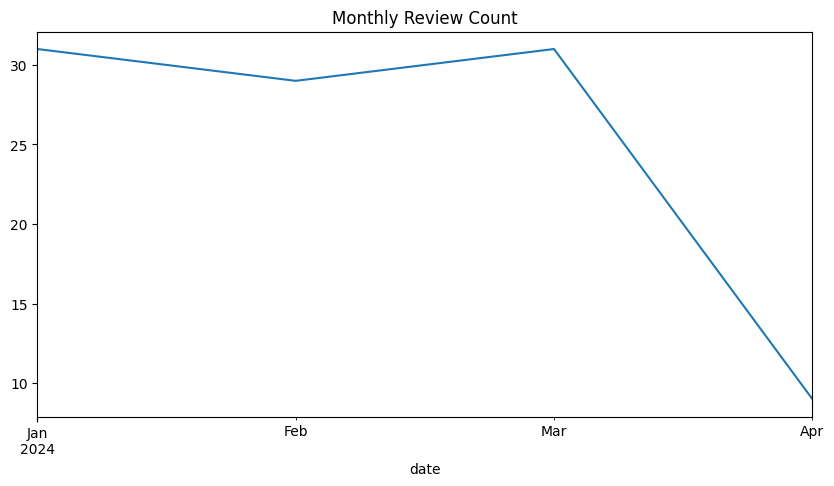

In [ ]:

df['date'] = pd.to_datetime(df['date'])

# Plot review trend
df.set_index('date')['review_id'].resample('M').count().plot(kind='line', figsize=(10,5), title="Monthly Review Count")
plt.show()


**How to Increase Positive Reviews & Sales**

1. Encourage More Verified Purchases

  ✔ Offer discounts or loyalty points for verified customers.

  ✔ Clearly highlight the benefits of verified purchases.

2. Address Negative Feedback Proactively

  ✔ Respond to negative reviews with resolutions.

  ✔ Improve product descriptions to reduce misleading expectations.

3. Boost Customer Engagement for More Reviews

  ✔ Send follow-up emails requesting feedback.

  ✔ Offer incentives (discounts, exclusive deals) for leaving reviews.

4. Improve Customer Experience

  ✔ Optimize product quality based on common complaints.

  ✔ Enhance shipping speed and customer service.